## MNIST Dataset

#### The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for images classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. 

In [82]:
import tensorflow
tensorflow.__version__

import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential


In [9]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [13]:
print('xtrain: ',xtrain.shape)
print('ytrain: ',ytrain.shape) 
print('xtest: ',xtest.shape)
print('ytest: ',ytest.shape)

xtrain:  (60000, 28, 28)
ytrain:  (60000,)
xtest:  (10000, 28, 28)
ytest:  (10000,)


### Xtrain and Xtest contains greyscale RGB codes (from 0 to 255) while ytrain and ytest contains labels from 0 to 9 which represents which number they actually are.



Label: 3


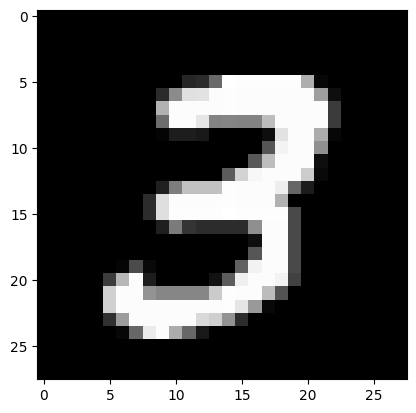

In [25]:
print('Label: {}'.format(ytrain[7]))
plt.imshow(xtrain[7], cmap='gray')

## Let us Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e = number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [48]:
xtrain.reshape(60000, 28,28,1)

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [58]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[1], 1)

## Normalize data
- we must normalize our data as it is always required in neural network models.
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize xtrain and xtest
- make sure that the values are float so that we can get decimal points after division. 

In [59]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain /= 255
xtest /= 255

In [62]:
print("xtrain shape:", xtrain.shape)
print("Images in xtrain:", xtrain.shape[0])
print("Images in xtest:", xtest.shape[0])
print("Max value in xtrain:", xtrain.max())
print("Min value in xtrain:", xtrain.min())


xtrain shape: (60000, 28, 28, 1)
Images in xtrain: 60000
Images in xtest: 10000
Max value in xtrain: 1.0
Min value in xtrain: 0.0


## One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert ytrain and ytest
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [64]:
ytrain = to_categorical(ytrain,num_classes=10)
ytest = to_categorical(ytest,num_classes=10)

print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

ytrain shape: (60000, 10)
ytest shape: (10000, 10)


In [65]:
print("One value of y_train:", ytrain[0])

One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernal size: 3x3
    - activation: "relu"
    - input shape: (28,28,1) for first layer
- flatten the data
    - add flatten layer
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - numbers of neurons in first layer: 128
    - numbers of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes. 

In [68]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))


## Compile and fit the model

- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizers: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epoch: 10
    - give validation data - testing features and labels

In [70]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [71]:
model.fit(xtrain, ytrain, batch_size=128, epochs=10, validation_split=0.3)

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.8906 - loss: 0.3486 - val_accuracy: 0.9818 - val_loss: 0.0635
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9791 - val_loss: 0.0692
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9852 - val_loss: 0.0528
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9966 - loss: 0.0117 - val_accuracy: 0.9846 - val_loss: 0.0567
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.9835 - val_loss: 0.0635
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9974 - loss: 0.0078 - val_accuracy: 0.9848 - val_loss: 0.0671
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.9851 - val_loss: 0.0698
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9983 - loss: 0.0048 - 

In [76]:
model.evaluate(xtest, ytest)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9858 - loss: 0.0698


[0.055824339389801025, 0.9883000254631042]

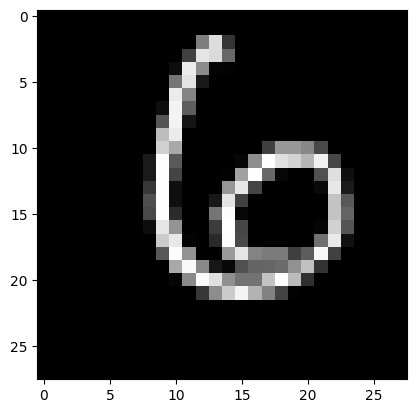

In [78]:
plt.imshow(xtest[100].reshape(28, 28), cmap='gray')

In [80]:
model.predict(xtest[100].reshape(1, 28, 28, 1)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


6

In [81]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,216,480 (54.23 MB)

 Trainable params: 4,738,826 (18.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,477,654 (36.15 MB)

## Vanilla CNN + Pooling + Dropout

### Initialize a sequential model again

- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernal size: 3x#
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling later of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten layer
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - numbers of neurons in first layer: 128
    - number of neurons in the last layer: number of classes
    - activation function in first later: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer, however, the final Dense layer must have neurons equal to the number of output classes. 

In [83]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = 3, activation = "relu", input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.20))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation="softmax"))



### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- Use EarlyStopping
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [84]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=xtrain, y=ytrain, batch_size=32, epochs=10, validation_data=(xtest, ytest), callbacks=[callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9178 - loss: 0.2678 - val_accuracy: 0.9853 - val_loss: 0.0453
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9861 - loss: 0.0466 - val_accuracy: 0.9898 - val_loss: 0.0312
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9902 - loss: 0.0297 - val_accuracy: 0.9903 - val_loss: 0.0307


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: 7
Softmax Outputs: [[2.49156574e-06 2.04276741e-02 3.69368610e-03 1.13285889e-04
  2.02188826e-08 6.36068531e-09 3.64754310e-10 9.75742996e-01
  9.60715715e-06 1.03172115e-05]]
1.0000001


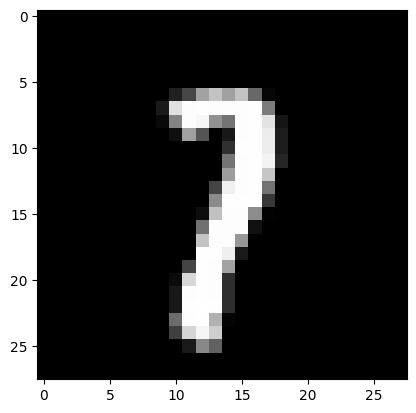

In [103]:
plt.imshow(xtest[111].reshape(28,28), cmap='gray')
ypred = model.predict(xtest[111].reshape(1,28,28,1))
print("Predicted label:", ypred.argmax())
print("Softmax Outputs:", ypred)
print(ypred.sum())


(28, 28)